In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from history_plot import plot_accuracy, plot_loss
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = os.getcwd()
LARGE_DATASET_DIR = os.path.join(BASE_DIR, 'large_dataset')
TRAIN_DIR = os.path.join(LARGE_DATASET_DIR, 'train')
TEST_DIR = os.path.join(LARGE_DATASET_DIR, 'test')

In [3]:
train_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='training'
)

Found 5922 images belonging to 2 classes.


In [4]:
validation_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='validation'
)

Found 1480 images belonging to 2 classes.


In [5]:
test_batch = ImageDataGenerator(rescale=1/255).flow_from_directory(
    TEST_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
)

Found 602 images belonging to 2 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(train_batch, validation_data=validation_batch, batch_size=32, epochs=15)

Epoch 1/15
186/186 [==============================] - 71s 324ms/step - loss: 0.1095 - accuracy: 0.9613 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 2/15
186/186 [==============================] - 59s 317ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 3/15
186/186 [==============================] - 59s 318ms/step - loss: 6.0900e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/15
186/186 [==============================] - 60s 320ms/step - loss: 1.5397e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/15
186/186 [==============================] - 59s 319ms/step - loss: 8.8717e-06 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/15
186/186 [==============================] - 59s 319ms/step - loss: 5.3462e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/15
186/186 [==============================] - 59s 319ms/step - loss: 3.2486e-06 - accuracy: 1.0000 - val_l

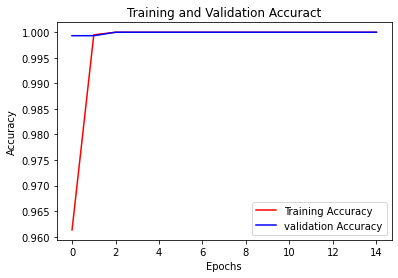

In [10]:
plot_accuracy(history)

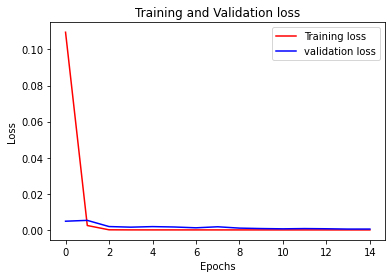

In [11]:
plot_loss(history)

In [12]:
predicted = model.evaluate(test_batch)

19/19 [==============================] - 3s 160ms/step - loss: 0.1378 - accuracy: 0.9718


In [13]:
predicted

[0.1377716213464737, 0.9717608094215393]

In [14]:
model.save('002.h5')